# Ejercicio con kNNs

Primero, descargamos un dataset sobre el que vamos a trabajar en nuestro ejercicio en un subdirectorio `data` de nuestro directorio de trabajo:

In [2]:
!curl -o data/diabetes.csv https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k


A continuación, cargamos los módulos que utilizaremos en el ejercicio:

In [3]:
# Nuestros sospechosos habituales
import pandas as pd
import numpy as np

# También, como siempre, nos apoyamos en Scikit-Learn para hacer el split en training y test
from sklearn.model_selection import train_test_split
# Usaremos el preprocesador StandardScaler para no tener sesgos en los datos
# de entrada
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Importamos herramientas para evaluar el modelo. F1 es la media
# armónica de precision y recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Ahora es el turno de cargar el dataset en un Pandas dataframe y de investigar un poco qué es lo que tenemos en términos de número de muestras y de features. Apoyaos en la documentación pública de Pandas para investigar cómo cargar un dataset (lo veremos en clase de todas formas). Escribid el código en los placeholders marcados con `#tu código aquí#`:

In [4]:
# Leemos el CSV que hemos descargado con la ayuda de los métos que nos ofrecen
# los dataframes de Pandas
dataset = pd.read_csv("data/diabetes.csv",sep=",") #tu código aquí#

# Vemos cuántas muestras tiene nuestro dataset
print("Tamano dataset:", dataset.shape)#tu código aquí#

# Miramos también qué pinta tiene el dataset desde el
# punto de vista de características y etiquetas, usando las capacidades de
# nuevo de los dataframes de Pandas
print("Caracteristicas:", list(dataset))#tu código aquí#

Tamano dataset: (768, 9)
Caracteristicas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [5]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Trata de investigar si hay columnas del dataset que contienen valores que son nulos y que no tienen sentido. Como ejemplo, un grosor de piel de valor cero no tiene mucho sentido:

In [6]:
# Escribe código para filtrar los valores nulos de 1 columna del DataFrame y visualizarlos,
# deberías poder hacerlo en 1 línea
dataset[dataset['SkinThickness']==0]#tu código aquí#

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Comprobacion si hay valores nulos
dataset.isnull().values.any()

False

In [9]:
#Comprobacion si hay valores NA
dataset.isna().values.any()

False

In [10]:
# Calculo Media Una columna sin tener en cuenta valores 0
dataset["SkinThickness"].mean()

20.536458333333332

In [11]:
# Calculo media teniendo en cuenta valores 0
dataset[dataset["SkinThickness"]!=0]["SkinThickness"].mean()

29.153419593345657

Ahora, para la columna correspondiente a la feature que has elegido explorar (por ejemplo, skinThickness), calcula la media de los valores:

In [12]:
# Calcula la media de los valores de 1 columna de tu DataFrame
dataset["SkinThickness"].mean()#tu código aquí#

20.536458333333332

Lo que vamos a hacer ahora es sustituir los valores nulos por la media de todos los valores de la columna, con el objetivo de poder seguir contando con las muestras que los tienen. Como pista, debes hacer esa operación para todas estas columnas en el DataFrame: 'Glucose','BloodPressure','SkinThickness','BMI','Insulin'. Lo mejor es que escribas código que itere sobre esas columnas para realizar la operación:

In [13]:
#Copia de dataset a uno para probar
ds_copy = dataset.copy()

In [14]:
id(ds_copy)

139866780673424

In [15]:
id(dataset)

139866716208400

In [113]:
# Almacena las columnas a alterar en una lista de Python
#tu código aquí#
ds_copy = dataset.copy();
# Itera sobre cada elemento de la lista, calculando la media y posteriormente sustituyendo los ceros por el valor calculado de la media
#tu código aquí#
Valores_Medios = dataset[dataset[:]!=0][:].mean()
#print(Valores_Medios)
for column in ds_copy.iloc[:,:-1]:
    #print(column)
    ds_copy.loc[ds_copy[column]==0,[column]]=Valores_Medios[column]
    #ds_copy.loc[lambda ds_copy: ds_copy[column]==0,[column]]=Valores_Medios[column]

In [81]:
#Comprobamos para uno de los elementos que se ha modificado
ds_copy["Glucose"][75]

121.6867627785059

In [82]:
#Comprobamos que del original tenemos 0
dataset["Glucose"][75]

0

In [84]:
#Comprobamos que no hay ningun 0 en una de las columnas
ds_copy[ds_copy['Glucose']==0]['Glucose']

Series([], Name: Glucose, dtype: float64)

In [85]:
#Comprobamos que en columna de salida hay 0
dataset["Outcome"].isin([0]).values.any()

True

In [86]:
#Comprobamos que en columna de salida hay 0
ds_copy["Outcome"].isin([0]).values.any()

True

In [107]:
#Comprobamos que en el dataset original hay valores 0
dataset.iloc[:,:-1].isin([0]).values.any()

True

In [106]:
#Comprobabos que en el nuevo DS no hay 0 despues de aplicar algoritmo.
ds_copy.iloc[:,:-1].isin([0]).values.any()

False

Antes de comenzar con el proceso de entrenamiento, como siempre, partimos el dataset en training y test. Elige un 20% del dataset para el conjunto de testing, dejando el 80% restante para el entrenamiento:

In [88]:
ds_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [89]:
# Recuerda que la columna nueve (índice 8) es la que tiene
# nuestras etiquetas, y que el resto contiene las features.
X = ds_copy.iloc[:,0:-1]#tu código aquí#
y = ds_copy["Outcome"]#tu código aquí#
# Haz el split, selecciona un 20% del dataset original como datos de test
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.20,random_state=0)#tu código aquí#

Lo siguiente será escalar los datos, ésta es una técnica de ingeniería de características que será necesaria para poder calcular distancias correctamente con KNNs (veremos más sobre esto en clase):

In [90]:
# Ahora escalamos los datos, de manera que todos los rangos van desde -1 hasta 1.
sc_X = StandardScaler()
# Hacemos training y transformación conjunta sobre el training set
X_train = sc_X.fit_transform(X_train)
# Tenemos que asegurarnos de que el testing set también está transformado
X_test = sc_X.transform(X_test)

Una buena estimación del número de vecinos suele ser la raíz cuadrada del número de características. Usa este número como tu configuración inicial de `n_neighbors` y procede crear y entrenar un kNN:

In [91]:
import math
math.sqrt(len(ds_copy))

27.712812921102035

In [114]:
# Define el modelo, inicializando kNN con los datos seleccionados
cls = KNeighborsClassifier(n_neighbors=6)#tu código aquí#
# Entrena el model
cls.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Finalmente, evalua el modelo sobre el dataset de test, y muestra la precisión obtenida:

In [115]:
#tu código aquí#
cls.score(X_test,y_test)

0.7662337662337663

In [109]:
# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

/home/dsc/anaconda3/envs/ks-sl/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


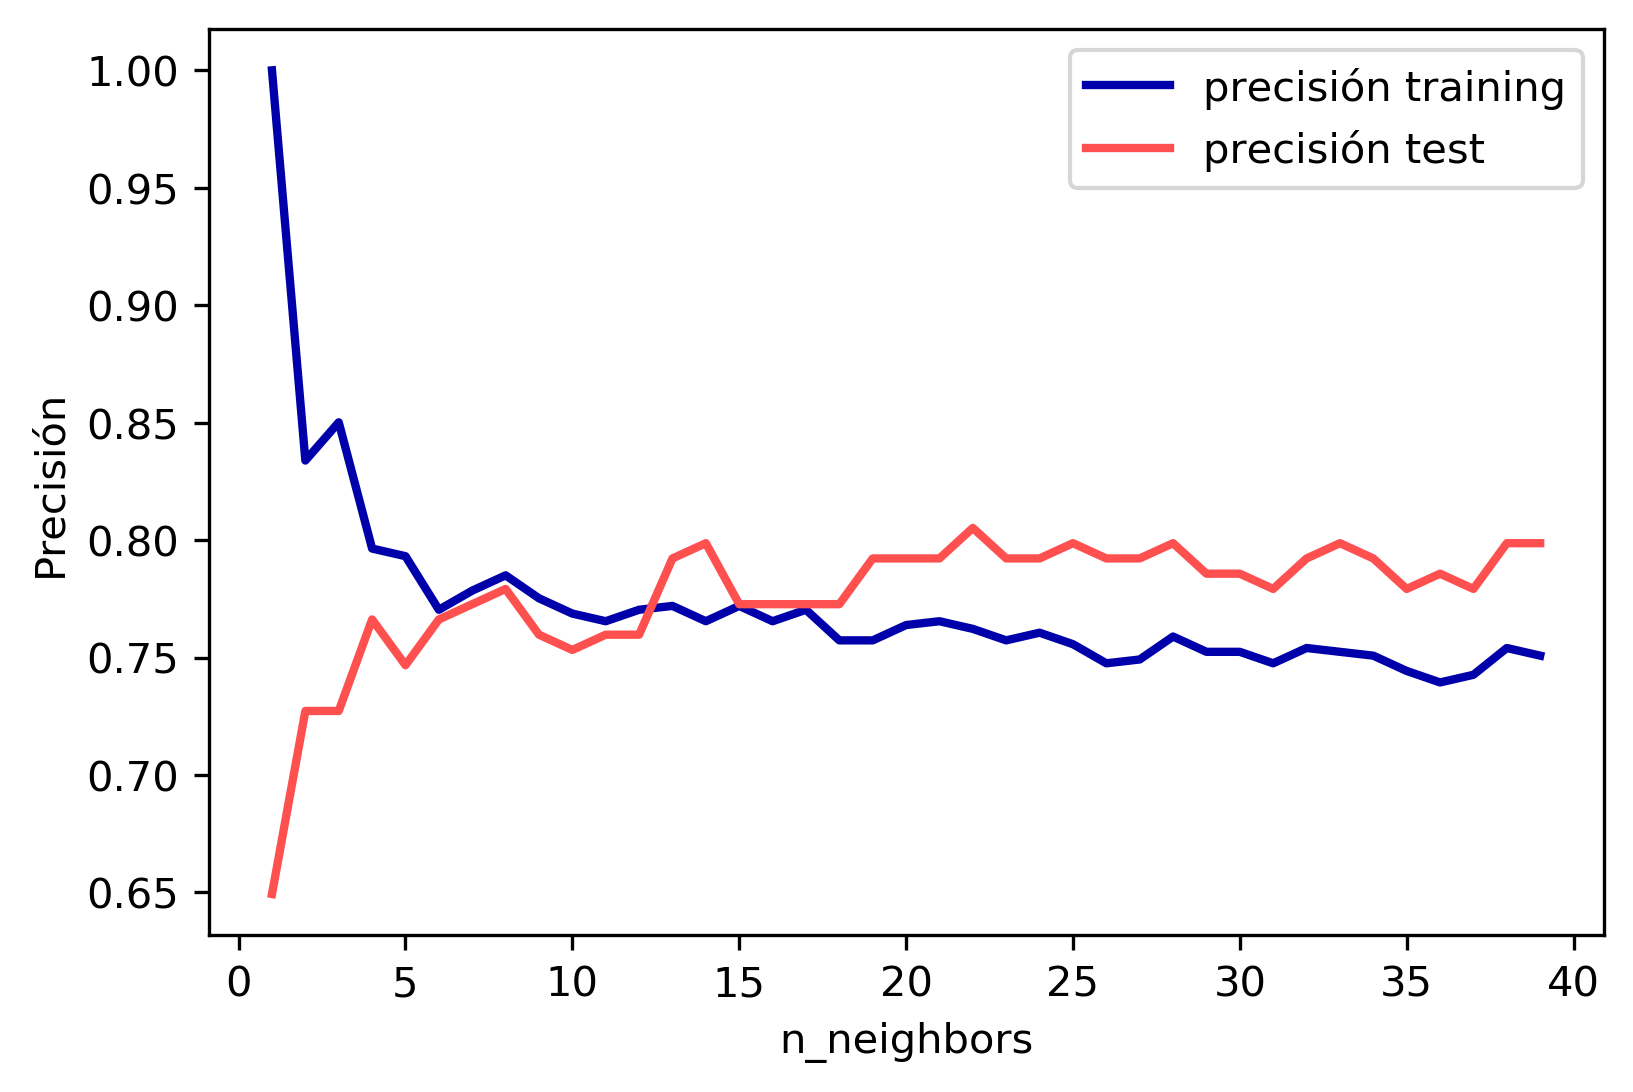

In [116]:
ds_copy2 = ds_copy.copy()
X_train, X_test, y_train, y_test = train_test_split (
    X,y,test_size=0.20,random_state=0)

training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train, y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,
         training_accuracy, label="precisión training")
plt.plot(neighbors_settings, test_accuracy, label="precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()